### 임계값과 평가지표

### 예측을 수행할때,
   * 0, 1로만 예측하는 것이 아니라
   * 1이 될 확률로 예측하는 게 있다.
   * 임계값을 가지고 0.5보다 크면 1로 예측, 0.5보다 작으면 0으로 예측

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from mglearn.datasets import make_blobs

## 데이터 만들기
X, y = make_blobs(n_samples=(400,50),
                 centers=2,
                 cluster_std=[7,0,2],
                 random_state=42)

In [5]:
print(X.shape, y.shape)
print(X[0:5], y[0:5])

(450, 2) (450,)
[[ 4.63987884  1.97316968]
 [-2.47249173  9.34315028]
 [-3.61525291  6.02611864]
 [-0.85989572 14.41034249]
 [ 4.63987884  1.97316968]] [1 0 0 0 1]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

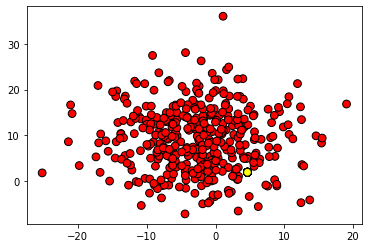

In [9]:
plt.scatter(X[:,0], X[:,1],
            c=y,
            cmap=plt.cm.autumn, s=60, edgecolors='k')

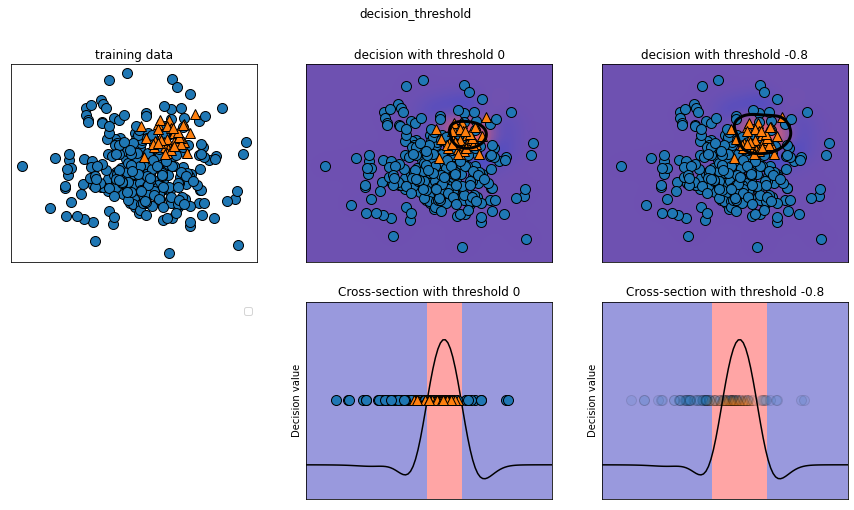

In [10]:
import mglearn
mglearn.plots.plot_decision_threshold()

In [12]:
from sklearn.svm import SVC

svc = SVC(gamma=.05).fit(X_train, y_train)
pred = svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       107
           1       0.67      1.00      0.80         6

    accuracy                           0.97       113
   macro avg       0.83      0.99      0.89       113
weighted avg       0.98      0.97      0.98       113



In [13]:
# 임계값은 낮출수록 True가 늘어난다.
pred = svc.decision_function(X_test)
print(pred[0:10])
np.min(pred), np.max(pred)

[-1.6241025  -0.18276658 -1.67434807 -1.62102948 -1.6190153  -1.61914456
 -1.98975564 -2.02614369 -1.72779204 -1.73999831]


(-2.149726543031174, 0.9996961123854393)